In [1]:
%pylab inline
import sys; sys.path.insert(0, "../")
import numpy as np
import time

from pandas import DataFrame
import seaborn as sns

from emcee.autocorr import *
from ensemble_sampler import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
dim = 2
nwalkers = 4
niters = 100000

mu = np.zeros(dim)
cov = np.identity(dim)

t_dist = MultivariateGaussian(cov=cov, mu=mu, dim=dim)

# Exp 1.

In [9]:
proposal = PCNWalkMove(beta=0.8)
sampler = Sampler(t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

start = time.time()
try:
    sampler.run_mcmc(niters, batch_size=1, random_start=True, store=True, store_every=50000, title='test')
except LinAlgError, err:
    print err
    
end = time.time()
print 'finishes in about %.2f seconds' % float(end - start)
try:
    print 'auto-correlation time: %s' % sampler.auto_corr()
except AutocorrError, err:
    print err

start location:  [[ 2.06773775  0.67039576]
 [ 1.53613035  0.059167  ]
 [-0.11331012  0.35332902]
 [ 0.16395883  0.79776572]]
1164 1
('error found:', RuntimeWarning('covariance is not positive-semidefinite.',))
1164 3
('error found:', RuntimeWarning('covariance is not positive-semidefinite.',))
1165 0
('error found:', RuntimeWarning('covariance is not positive-semidefinite.',))
Singular matrix
finishes in about 1.35 seconds
auto-correlation time: [ 532.32438302  149.34199994]


In [10]:
chain = sampler.history.get('chain').reshape([-1, 2])

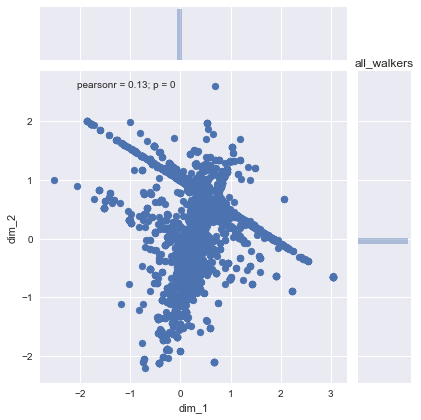

In [11]:
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[:, 0], chain[:, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df)
sns.plt.title('all_walkers')

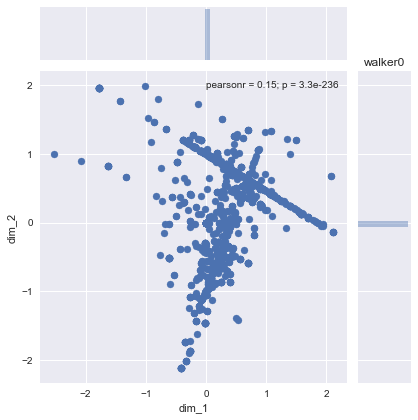

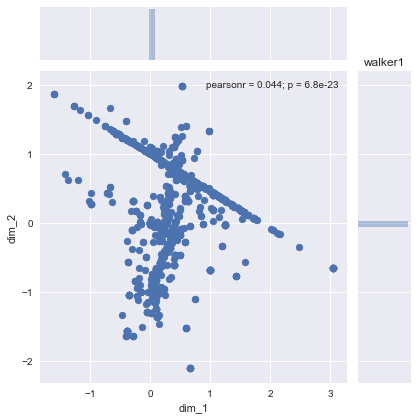

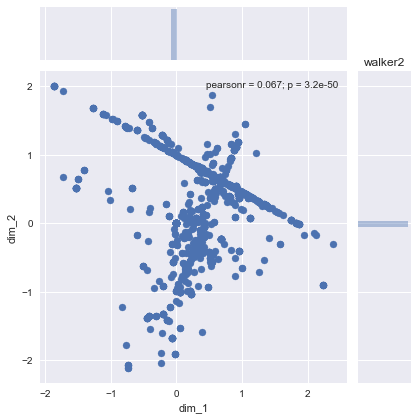

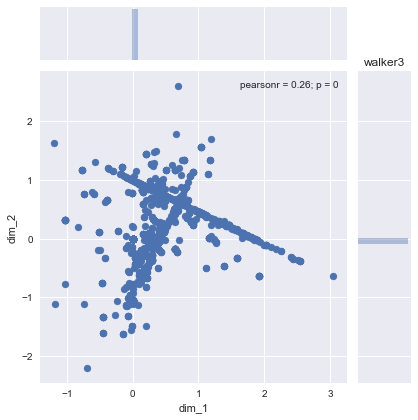

In [12]:
chain = sampler.history.get('chain')
x, y = ['dim_1', 'dim_2']
for i in range(nwalkers):
    df = DataFrame(np.vstack([chain[i, :, 0], chain[i, :, 1]]).T, columns=[x, y])
    sns.jointplot(x=x, y=y, data=df)
    sns.plt.title('walker%s' % i)

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


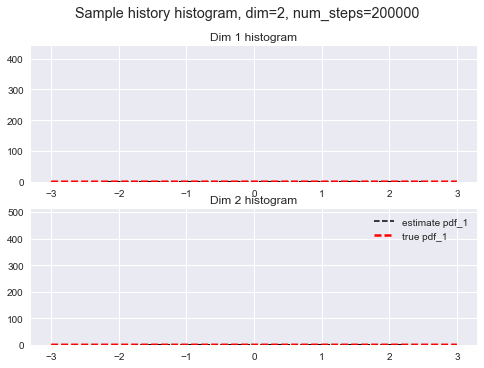

In [8]:
import math
def pdf(x):
    return np.exp(-x**2 / 2.0) / np.sqrt(2*math.pi)

chain = sampler.history.get_flat('chain', get_every=100)

n = 2
num_steps = len(chain)
num_bins = int(num_steps * 0.01)

fig, axs = plt.subplots(2, 1)
fig.suptitle("Sample history histogram, dim=%s, num_steps=%s" % (dim, num_steps))
for i in range(2):
    idx = i if n == 1 or n == 2 else (i // 2, i % 2)
    _, bins, _ = axs[idx].hist(chain[:, i], num_bins, normed=1)
    
    y = pylab.normpdf(bins, 0, 1)
    l = axs[idx].plot(bins, y, 'k--', lw=1.5, label='estimate pdf_%s' % i)
    
    x = np.linspace(-3, 3, num_bins)
    p = axs[idx].plot(x, pdf(x), 'r--', lw=2.5, label='true pdf_%s' % i)
    pylab.legend()
    axs[idx].plot()
    axs[idx].set_title("Dim %s histogram" % int(i+1))

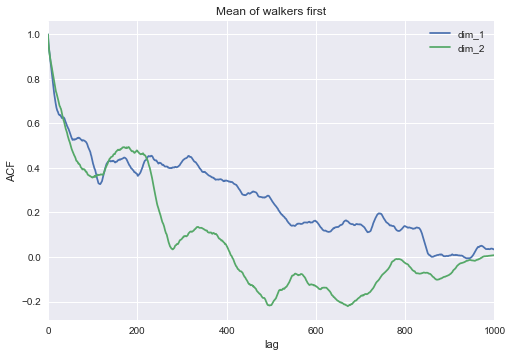

In [13]:
chain = sampler.history.get('chain')
plot_acf(chain, mean_first=True, max_lag=1000)

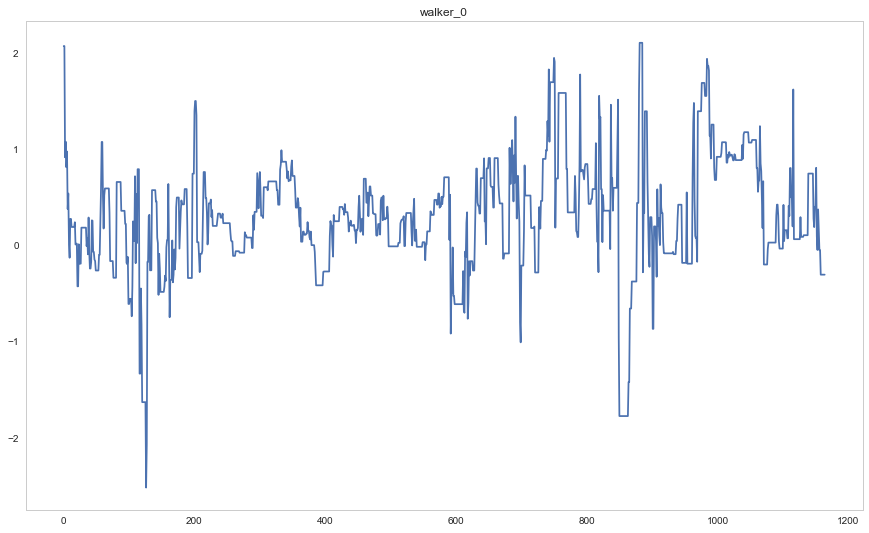

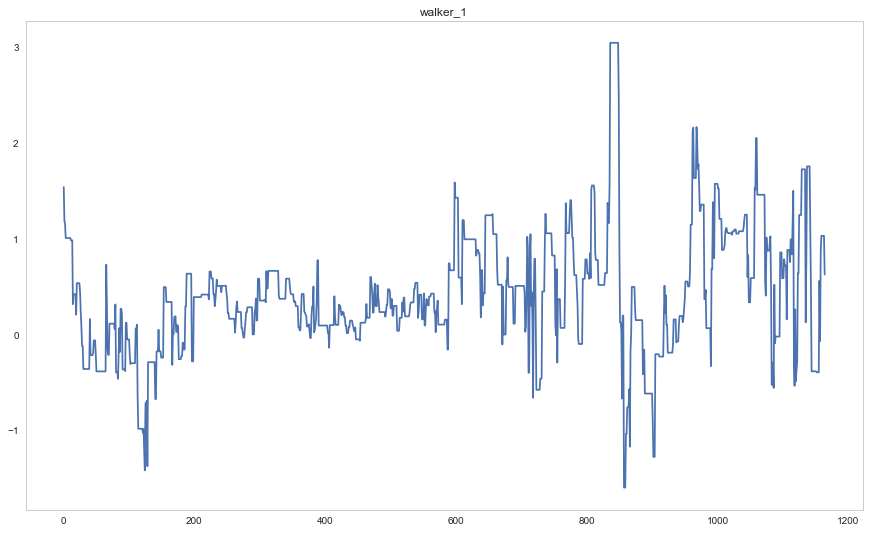

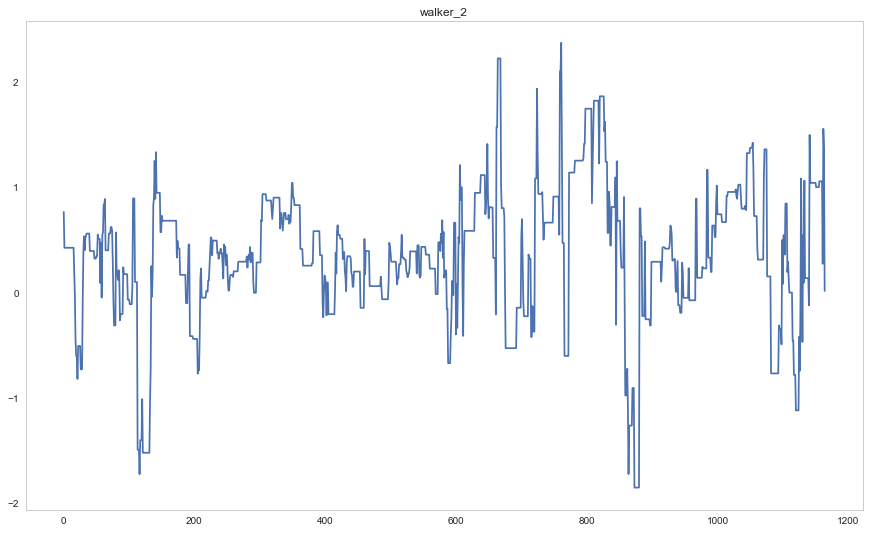

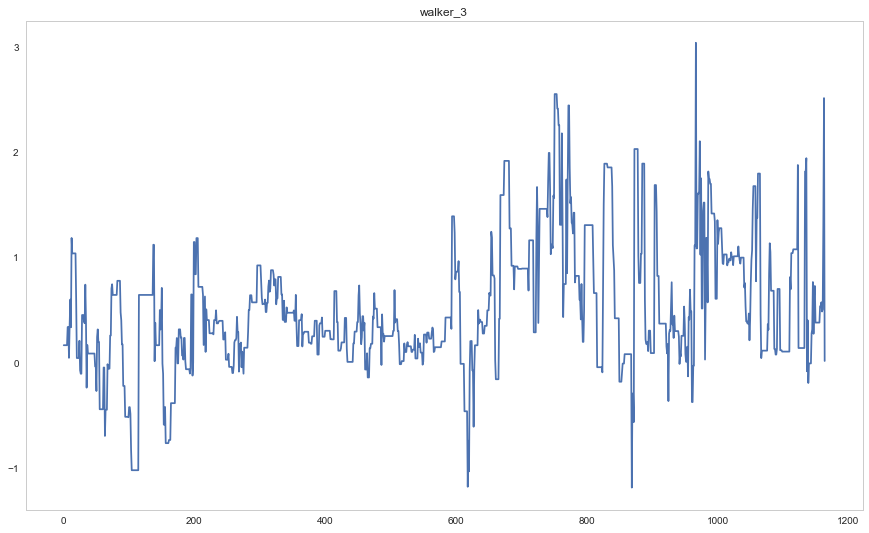

In [14]:
chain = sampler.history.get('chain')
for i in range(nwalkers):
    fig = plt.figure(figsize=(15, 9))
    plt.plot(np.arange(1165), chain[i, :1165, 0])
    plt.title('walker_%s' % i)
plt.show()

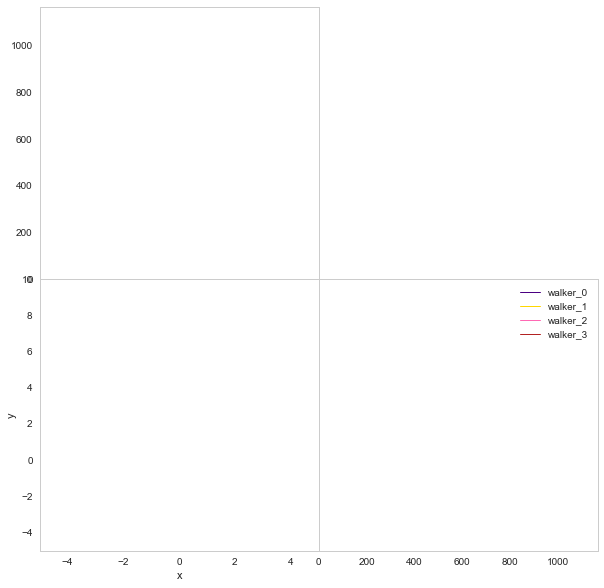

In [15]:
from matplotlib.animation import FuncAnimation

visualizer = Visualizer(sampler.history, False, max_len=1165, print_every=200)
animation = FuncAnimation(fig=visualizer.fig, func=visualizer, init_func=visualizer.init,
                        frames=np.arange(1165), interval=50, blit=True, repeat=False)

In [10]:
from IPython.display import HTML
HTML(animation.to_html5_video())

200
400
600
800


In [27]:
animation.save('download.mp4')

200
400
600
800
1000


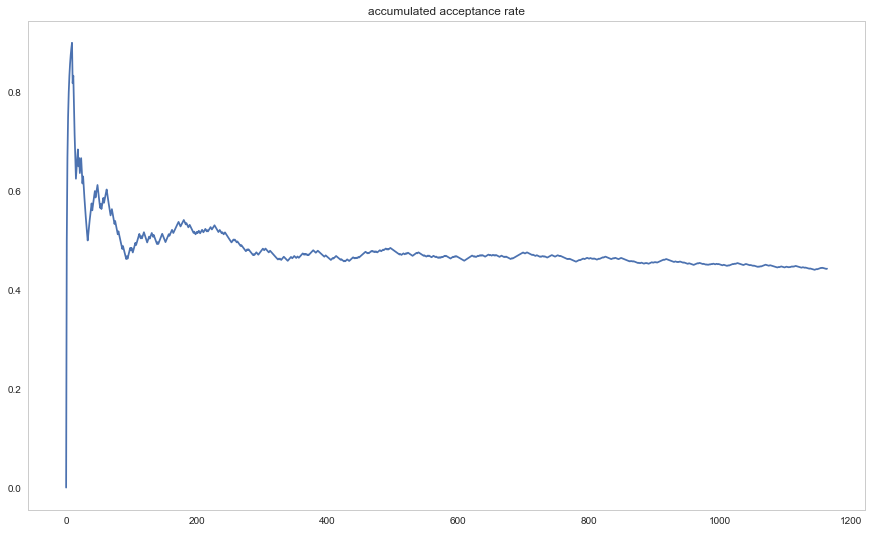

In [28]:
cum_acceptance_prob = np.cumsum(sampler.accepted[0])[1:] / np.arange(len(sampler.accepted[0]))[1:]
fig = plt.figure(figsize=(15, 9))
plt.plot(np.arange(1165), cum_acceptance_prob[:1165])
plt.title('accumulated acceptance rate')

# Exp 2.

In [22]:
proposal = PCNWalkMove(beta=0.1)
sampler = Sampler(t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

start = time.time()
try:
    sampler.run_mcmc(niters, batch_size=1, random_start=True, store=True, store_every=50000, title='test')
except LinAlgError, err:
    print err
    
end = time.time()
print 'finishes in about %.2f seconds' % float(end - start)
try:
    print 'auto-correlation time: %s' % sampler.auto_corr()
except AutocorrError, err:
    print err

start location:  [[-0.53130271 -1.1348885 ]
 [-0.35365419  0.69938772]
 [-0.68678854  0.26996317]
 [ 0.62471548 -0.29413678]]
4309 2
('error found:', RuntimeWarning('covariance is not positive-semidefinite.',))
4309 3
('error found:', RuntimeWarning('covariance is not positive-semidefinite.',))
4310 0
('error found:', RuntimeWarning('covariance is not positive-semidefinite.',))
4310 1
('error found:', RuntimeWarning('covariance is not positive-semidefinite.',))
4310 2
('error found:', RuntimeWarning('covariance is not positive-semidefinite.',))
Singular matrix
finishes in about 4.35 seconds
The chain is too short to reliably estimate the autocorrelation time


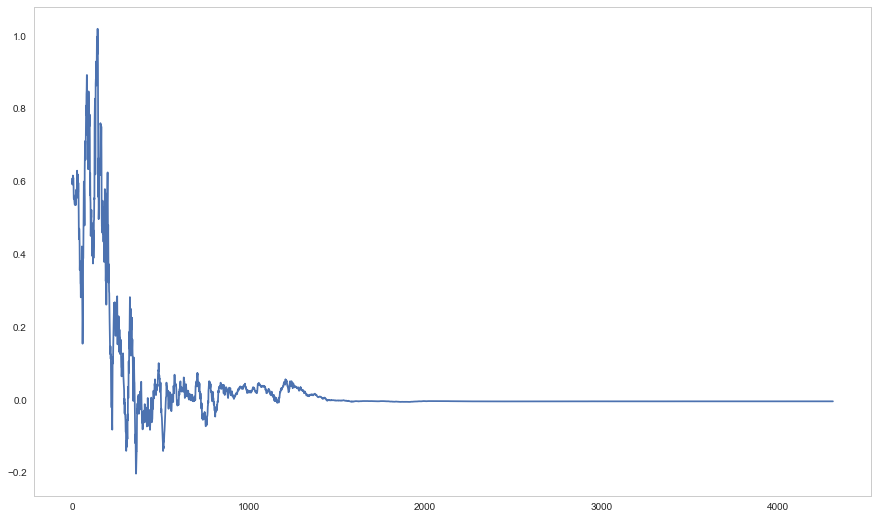

In [31]:
chain = sampler.history.get('chain')

fig = plt.figure(figsize=(15, 9))
plt.plot(np.arange(4310), chain[3, :4310, 0])
plt.show()

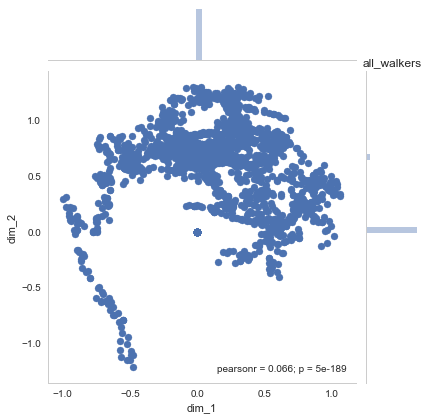

In [27]:
chain = sampler.history.get_flat('chain')
x, y = ['dim_1', 'dim_2']
df = DataFrame(np.vstack([chain[:, 0], chain[:, 1]]).T, columns=[x, y])
sns.jointplot(x=x, y=y, data=df)
sns.plt.title('all_walkers')

200
400
600
800
1000
1200
1400
1600
1800


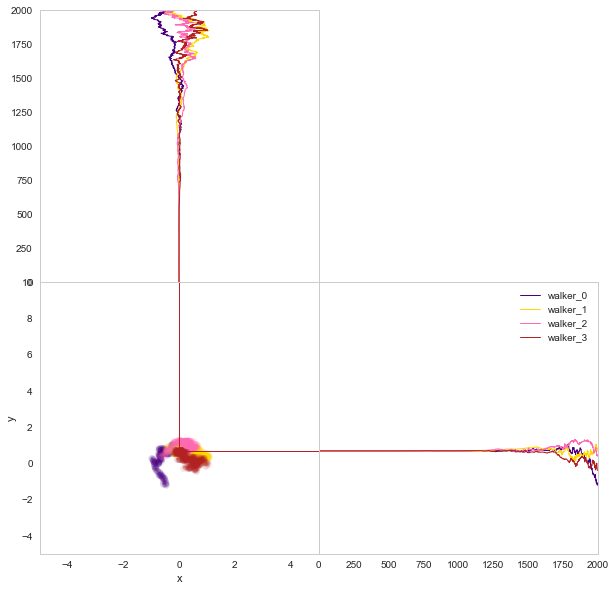

In [33]:
from matplotlib.animation import FuncAnimation

visualizer = Visualizer(sampler.history, False, max_len=2000, print_every=200)
animation = FuncAnimation(fig=visualizer.fig, func=visualizer, init_func=visualizer.init,
                        frames=np.arange(2000), interval=50, blit=True, repeat=False)
animation.save('beta_0.1.mp4')

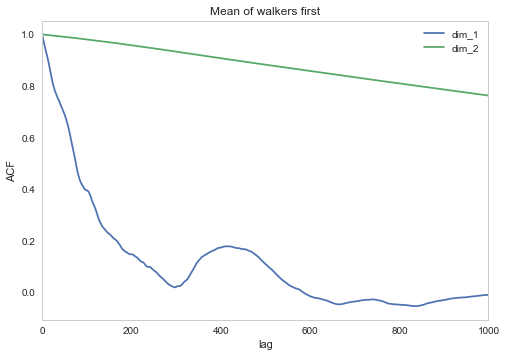

In [28]:
chain = sampler.history.get('chain')
plot_acf(chain, mean_first=True, max_lag=1000)

# Exp 3.

In [40]:
proposal = PCNWalkMove(beta=0.3)
sampler = Sampler(t_dist=t_dist, proposal=proposal, nwalkers=nwalkers)

start = time.time()
try:
    sampler.run_mcmc(niters, batch_size=1, random_start=True, store=True, store_every=50000, title='test')
except LinAlgError, err:
    print err
    
end = time.time()
print 'finishes in about %.2f seconds' % float(end - start)
try:
    print 'auto-correlation time: %s' % sampler.auto_corr()
except AutocorrError, err:
    print err

start location:  [[-0.9967368  -0.01545307]
 [ 0.74204614  0.45640958]
 [-0.14305622  0.4739932 ]
 [-0.84876127  1.63996064]]
925 3
('error found:', RuntimeWarning('covariance is not positive-semidefinite.',))
1163 0
('error found:', RuntimeWarning('covariance is not positive-semidefinite.',))
Singular matrix
finishes in about 2.29 seconds
The chain is too short to reliably estimate the autocorrelation time


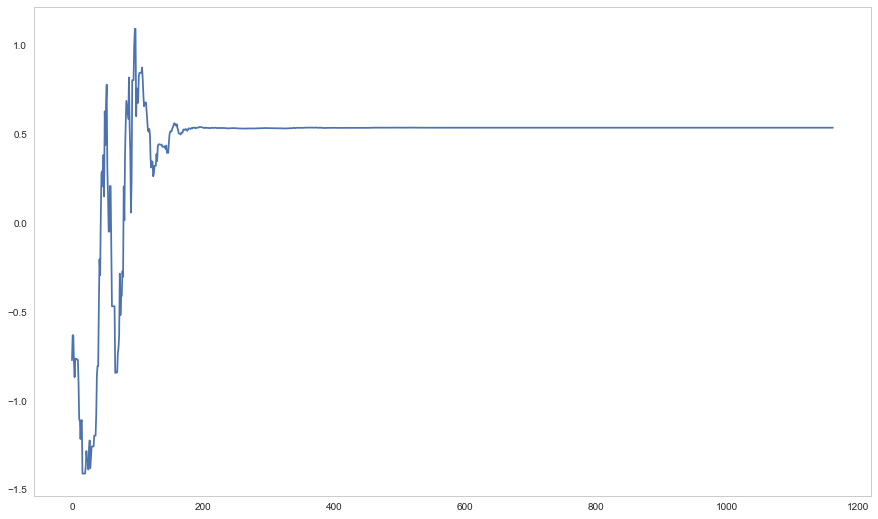

In [42]:
chain = sampler.history.get('chain')

fig = plt.figure(figsize=(15, 9))
plt.plot(np.arange(1163), chain[3, :1163, 0])
plt.show()

In [ ]:
fig = plt.figure(figsize=(15, 9))
plt.plot(np.arange(niters), chain[0, :, 0])
plt.show()